In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import itertools
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
dataset = pd.read_json('reviews.json')

In [3]:
dataset.reviews = dataset.reviews_title.str.cat(dataset.reviews,sep='. ')

In [4]:
dataset

,Date,name,rating,reviews,reviews_title
0,2018-04-21,Gregory E. Howard,5,offer a light easily bright enough for the guy...,offer a light easily bright enough for the guy...
1,2018-04-20,Sue,5,Dependable. It's a great bright LED light. Pe...,Dependable
10,2018-04-16,Courtney,5,"Bright, but eats batteries. Very bright, I wor...","Bright, but eats batteries"
100,2018-04-03,Richard S.,2,NOT 300 LUMENS. Overall it is well built for t...,NOT 300 LUMENS
101,2018-04-03,cb,5,brite lite. awesome little lights,brite lite
102,2018-04-03,COLLAGENIKOV. JOHN M. PRESCOTT,5,2 items. So very very cheap.BUY NOW. IT'S LIK...,2 items. So very very cheap.BUY NOW. IT'S LIK...
103,2018-04-03,Sabine A.,2,"One of the two flashlights works, one doesn't....","One of the two flashlights works, one doesn't."
104,2018-04-03,Deb Mino,5,Great little gadget. Very practical flashlight...,Great little gadget
105,2018-04-03,Ryan Shi,5,"good quality, bright enough. small in size, go...","good quality, bright enough"
106,2018-04-03,Fran Dux,2,I do not recommend this flashlight. The zoom d...,I do not recommend this flashlight


In [10]:
reviews= dataset['reviews']
reviews_title = dataset['reviews_title']
rating = dataset['rating']
date = dataset['Date']

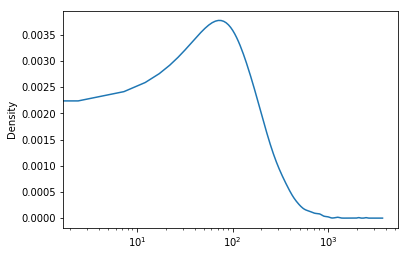

In [6]:
review_lengths = reviews.apply(lambda r: len(r))
review_lengths.describe()
review_lengths.plot(kind='kde', logx=True)
plt.show()

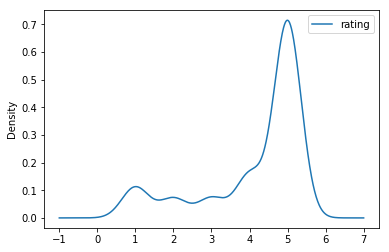

In [11]:
df3 = pd.DataFrame(rating)
reviews_title_rating = df3.plot(kind = 'kde')
plt.show()

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/heli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean words ###

In [10]:
clean_review = []
for i in range(0, 793):
    review = re.sub('[^a-zA-Z]', ' ', dataset['reviews'][i])

    review = review.lower()

    review = review.split()

    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    clean_review.append(review) 

In [11]:
clean_review = clean_review

In [12]:
cv = CountVectorizer()
cv_x = cv.fit_transform(clean_review).toarray()

### bag of words ###

In [13]:
cv = CountVectorizer(max_features = 1600)
x = cv.fit_transform(clean_review).toarray()
y = dataset.iloc[:, 2].values


### set train data and test data ###

In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


In [15]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### logistic regression ###

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[ 1,  1,  0,  1, 13],
       [ 0,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  3],
       [ 1,  3,  0,  1, 20],
       [ 4,  4,  0,  7, 96]])

In [18]:
accuracy_logistic = cm.trace()/cm.sum()

In [19]:
accuracy_logistic

0.62264150943396224

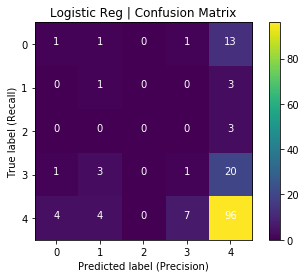

In [20]:
plt.imshow(cm, interpolation = 'nearest')

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar()
plt.show()

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.618
Best parameters:  {'C': 0.001}


In [23]:
print("{:.3f}".format(grid.score(x_test, y_test)))

0.698


### random forest###

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


In [33]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[  0,   0,   0,   1,  15],
       [  0,   0,   0,   1,   3],
       [  0,   0,   0,   0,   3],
       [  1,   1,   1,   0,  22],
       [  2,   1,   1,   4, 103]])

In [36]:
accuracy_random = cm.trace()/cm.sum()

In [37]:
accuracy_random

0.64779874213836475

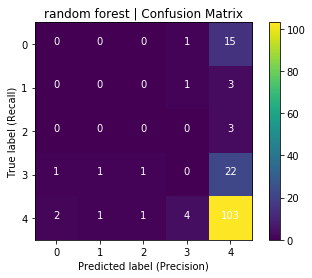

In [38]:
plt.imshow(cm, interpolation = 'nearest')

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('random forest | Confusion Matrix')
plt.colorbar()
plt.show()